Directories exist; saving data


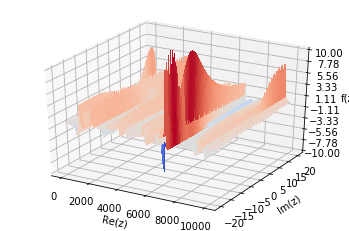

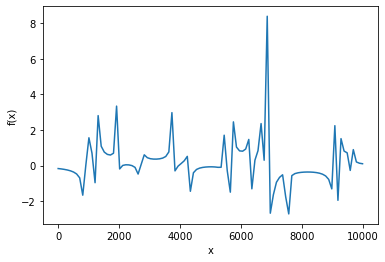

In [254]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from rmm import rmm_utils
from rmm import rmm_plot


# Generate toy model data

importlib.reload(rmm_utils)
importlib.reload(rmm_plot)

# Parameters
path = 'training_data/test'
number_of_poles = 20
true_poles = rmm_utils.random_poles(number_of_poles, [[1, 10000], [-20,20]])
#true_residues = 10*np.random.rand(number_of_poles)
true_residues = 100*np.array([ np.exp(1j*2*np.pi*np.random.rand(1)) for i in range(number_of_poles)])
X = np.linspace(1,10000,100)
Y = np.linspace(-20, 20, 50)

true_f = sum(c/(X - a) for c, a in zip(true_residues, true_poles))
# Run
complex_data, real_data = rmm_utils.generate_true_data('training_data/test1', X, Y, true_poles, true_residues)

SCALED
poles: -0.407211 + 0j, -0.128594 + 0j, -0.0149614 + 0j, -0.00400369 + 0j, -0.000483112 + 0j, -1.06623e-05 + 0j, -0.00194965 + 0j, -0.00606675 + -0.0634717j, -0.00606675 + 0.0634717j, -0.0101195 + -0.261942j, -0.0101195 + 0.261942j, -0.017057 + -0.218576j, -0.017057 + 0.218576j, -0.0177659 + -0.748441j, -0.0177659 + 0.748441j, -0.0297149 + -0.949383j, -0.0297149 + 0.949383j, -0.0336518 + -0.984644j, -0.0336518 + 0.984644j, -0.0339376 + -0.209569j, -0.0339376 + 0.209569j, -0.0381777 + -0.0999283j, -0.0381777 + 0.0999283j, -0.0389731 + -0.747361j, -0.0389731 + 0.747361j, -0.0408993 + 0j, -0.0465331 + -0.447601j, -0.0465331 + 0.447601j, -0.0527024 + -0.844639j, -0.0527024 + 0.844639j, -0.054862 + -0.626097j, -0.054862 + 0.626097j, -0.0560132 + -0.128444j, -0.0560132 + 0.128444j, -0.0584193 + -0.699707j, -0.0584193 + 0.699707j, -0.0891727 + -0.398857j, -0.0891727 + 0.398857j, -0.106979 + -0.944463j, -0.106979 + 0.944463j
residues: 4.21454 + 0j, -1.30266 + 0j, -0.0175403 + 0j, 0.00483

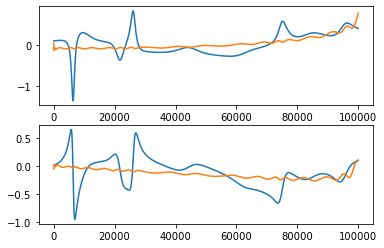

In [176]:
# Attempt using vectfit (ported from the original vectfit)

from rmm import vectfit
number_of_poles = 20
test_s = 1j*np.linspace(1,1e5, 800)

true_poles = rmm_utils.random_poles(number_of_poles, [[1, 10000], [1,1e5]])
true_residues = 1000*np.array([ np.exp(1j*2*np.pi*np.random.rand(1)) for i in range(number_of_poles)])
test_f = sum(c/(test_s- a) for c, a in zip(true_residues, true_poles))

fit_poles, fit_residues, d,h = vectfit.vectfit_auto_rescale(test_f, test_s, n_poles = 20, n_iter=10)

fitted = vectfit.model(test_s, fit_poles, fit_residues, d, h)

fig,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(test_s.imag, test_f.real)
ax1.plot(test_s.imag, fitted.real)

ax2.plot(test_s.imag, test_f.imag)
ax2.plot(test_s.imag, fitted.imag)
plt.show()